In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 삼성전자와 SK하이닉스의 티커 심볼 설정
tickers = ['226490.KS', '411060.KS']

# yfinance를 사용하여 주가 데이터 다운로드
data = yf.download(tickers, start='2023-01-01', end='2023-12-31')

# 'Adj Close' 데이터 가져오기
adj_close = data['Adj Close']

# 로그 수익률 계산
returns = np.log(adj_close / adj_close.shift(1)).dropna()

# 공분산 행렬 계산
cov_matrix = returns.cov()

# 기대 수익률 계산 (평균 일일 로그 수익률)
expected_returns = returns.mean()

cov_matrix, expected_returns


[*********************100%***********************]  2 of 2 completed


(           226490.KS  411060.KS
 226490.KS   0.000094  -0.000018
 411060.KS  -0.000018   0.000063,
 226490.KS    0.000825
 411060.KS    0.000544
 dtype: float64)

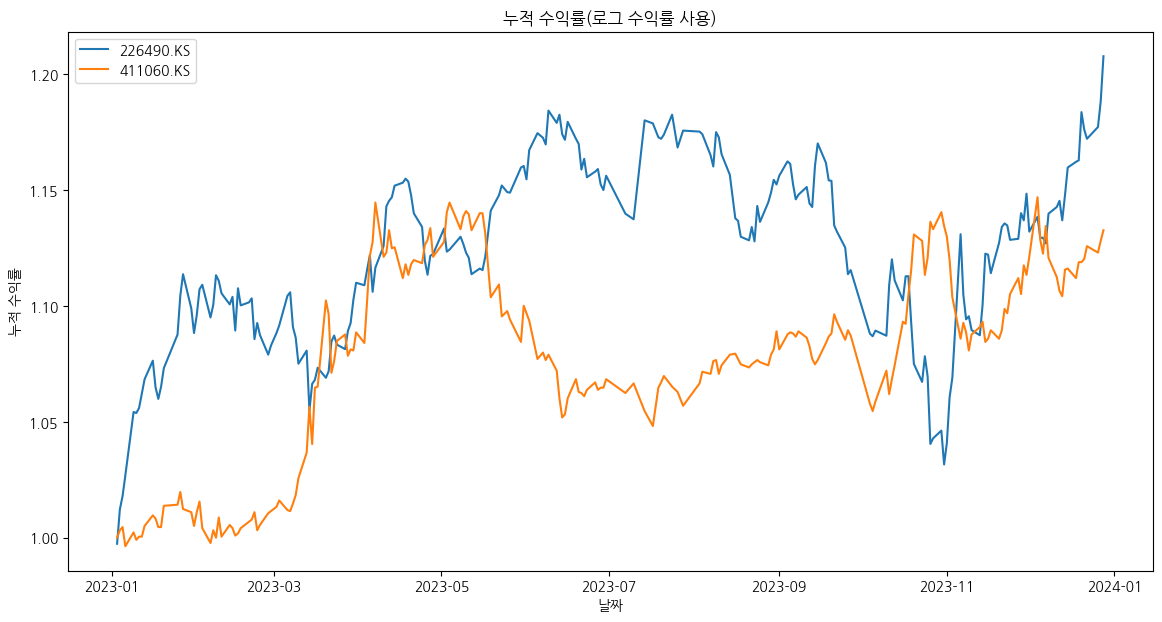

In [2]:
# matplotlib library load
import matplotlib.pyplot as plt

# plot 한글 보이게
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 누적 로그 수익률 계산
cumulative_log_returns = returns.cumsum().apply(np.exp)

# 시각화 설정 (한글 폰트 적용)
from matplotlib import rc
rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 누적 로그 수익률 시각화
plt.figure(figsize=(14, 7))
for ticker in tickers:
    plt.plot(cumulative_log_returns[ticker], label=ticker)

plt.title('누적 수익률(로그 수익률 사용)')
plt.xlabel('날짜')
plt.ylabel('누적 수익률')
plt.legend()
plt.show()

In [3]:
import math
math.sqrt(0.000094)

0.009695359714832657

In [4]:

# Simulating the calculation of expected returns (mean of daily returns)
expected_returns_simulated = returns.mean()

# Calculating volatility (standard deviation of returns) for each asset
volatility = returns.std()

# Assuming a risk-free rate of 0.05% for the Sharpe Ratio calculation
risk_free_rate = 0

# Calculating Sharpe Ratio for each asset
sharpe_ratio = (expected_returns_simulated - risk_free_rate) / volatility

volatility, sharpe_ratio


(226490.KS    0.009675
 411060.KS    0.007906
 dtype: float64,
 226490.KS    0.085240
 411060.KS    0.068851
 dtype: float64)

In [5]:
covMat = cov_matrix.to_numpy()
ER1 = expected_returns.to_numpy()[0]
ER2 = expected_returns.to_numpy()[1]

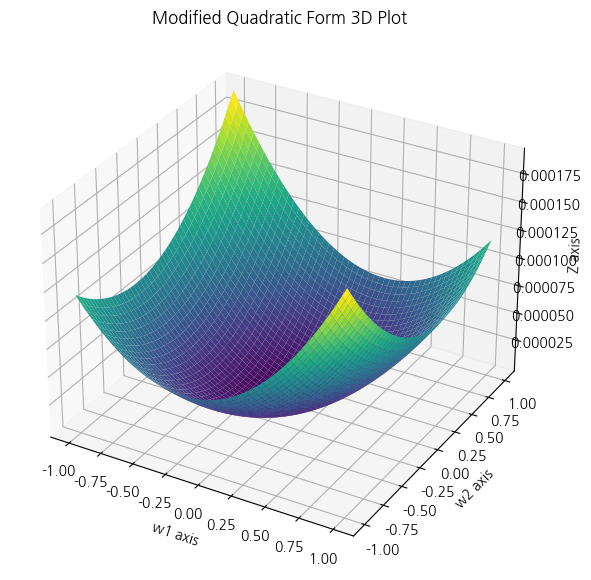

In [6]:
# Define the quadratic form
x = np.linspace(-1, 1, 400)
y = np.linspace(-1, 1, 400)
w1, w2 = np.meshgrid(x, y)

Z = np.empty(w1.shape)
for i in range(w1.shape[0]):
    for j in range(w1.shape[1]):
        W = np.array([w1[i, j], w2[i, j]])
        Z[i, j] = W.T @ covMat @ W

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(w1, w2, Z, cmap='viridis', edgecolor='none')

# Labels and title
ax.set_title('Modified Quadratic Form 3D Plot')
ax.set_xlabel('w1 axis')
ax.set_ylabel('w2 axis')
ax.set_zlabel('Z axis')

# Show the plot
plt.show()


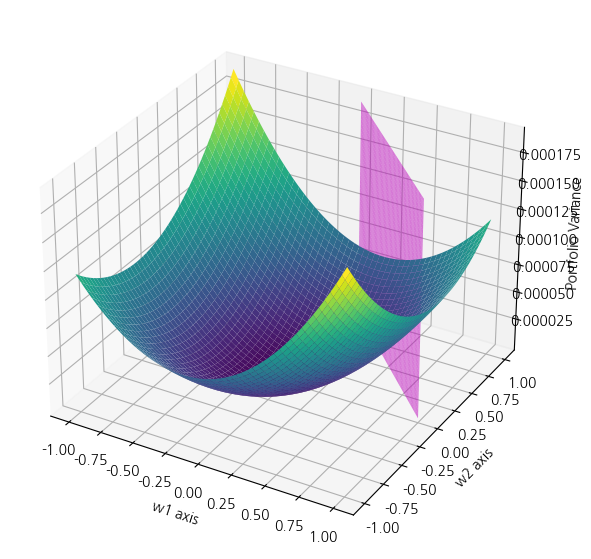

In [7]:
# Define the quadratic form
x = np.linspace(-1, 1, 400)
y = np.linspace(0-1, 1, 400)
w1, w2 = np.meshgrid(x, y)

# Compute Z values for the quadratic form
Z = np.empty(w1.shape)
for i in range(w1.shape[0]):
    for j in range(w1.shape[1]):
        W = np.array([w1[i, j], w2[i, j]])
        Z[i, j] = W.T @ covMat @ W

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface for the quadratic form
surf = ax.plot_surface(w1, w2, Z, cmap='viridis', edgecolor='none')

# Generate Z values across the entire range for the constraint plane
z_plane_range = np.linspace(Z.min(), Z.max(), 400)
w1_line = np.linspace(0, 1, 400)
w2_line = abs(1 - w1_line)
w1_plane_vertical = np.tile(w1_line, (len(z_plane_range), 1))
w2_plane_vertical = np.tile(w2_line, (len(z_plane_range), 1))
Z_plane_vertical = np.tile(z_plane_range[:, None], (1, len(w1_line)))

# Plot the vertical constraint plane
plane_vertical = ax.plot_surface(w1_plane_vertical, w2_plane_vertical, Z_plane_vertical, color='m', alpha=0.5)

# Labels and title
#ax.set_title('Corrected Quadratic Form with Vertical Constraint Plane')
ax.set_xlabel('w1 axis')
ax.set_ylabel('w2 axis')
ax.set_zlabel('Portfolio Variance')

# Show the plot
plt.show()

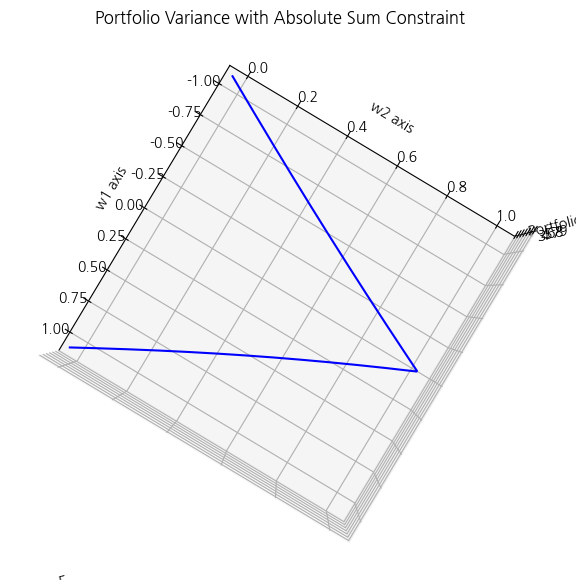

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# w1과 w2를 생성하되, 절대값의 합이 1을 만족하도록 설정
w1 = np.linspace(-1, 1, 400)
w2 = 1 - np.abs(w1)

# Z 값을 계산하기 위한 배열 생성
Z = np.array([np.array([w1i, w2i]).T @ covMat @ np.array([w1i, w2i]) for w1i, w2i in zip(w1, w2)])

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=90, azim=30)

# Plot the surface for the quadratic form
ax.plot(w1, w2, Z, color='blue')

# Labels and title
ax.set_title('Portfolio Variance with Absolute Sum Constraint')
ax.set_xlabel('w1 axis')
ax.set_ylabel('w2 axis')
ax.set_zlabel('Portfolio Variance')

plt.show()


---

In [9]:
ERP = 0.00075

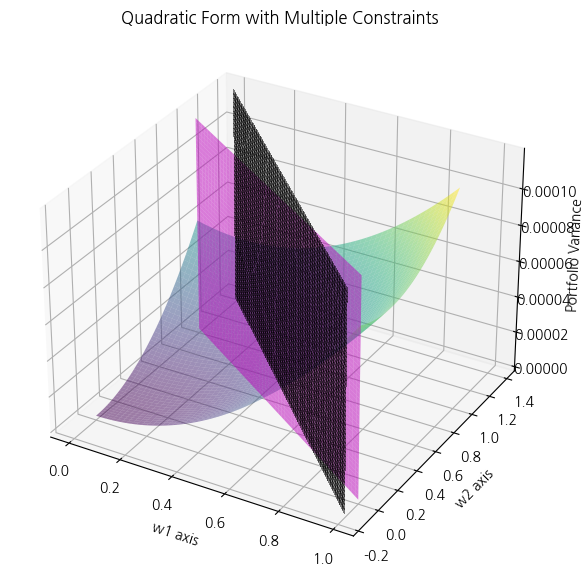

In [10]:
# Define the quadratic form
x = np.linspace(0, 1, 400)
y = np.linspace(0, 1, 400)
w1, w2 = np.meshgrid(x, y)

# Compute Z values for the quadratic form
Z = np.empty(w1.shape)
for i in range(w1.shape[0]):
    for j in range(w1.shape[1]):
        W = np.array([w1[i, j], w2[i, j]])
        Z[i, j] = W.T @ covMat @ W

# Create the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
#ax.view_init(elev=90, azim=10)

# Plot the surface for the quadratic form
surf = ax.plot_surface(w1, w2, Z, cmap='viridis', edgecolor='none', alpha=0.5)

# Generate Z values across the entire range for the constraint plane w1 + w2 = 1
z_plane_range = np.linspace(Z.min(), Z.max(), 400)
w1_line = np.linspace(0, 1, 400)
w2_line = 1 - w1_line
w1_plane_vertical = np.tile(w1_line, (len(z_plane_range), 1))
w2_plane_vertical = np.tile(w2_line, (len(z_plane_range), 1))
Z_plane_vertical = np.tile(z_plane_range[:, None], (1, len(w1_line)))

# Plot the vertical constraint plane representing w1 + w2 = 1
plane_vertical = ax.plot_surface(w1_plane_vertical, w2_plane_vertical, Z_plane_vertical, color='m', alpha=0.5)

w1_range = np.linspace(0, 1, 400)
Z_range_plane = np.linspace(Z.min(), Z.max(), 400)
w1_plane, Z_plane = np.meshgrid(w1_range, Z_range_plane)
w2_plane = (ERP - ER1*w1_plane) / ER2

plane_expected_return = ax.plot_surface(w1_plane, w2_plane, Z_plane, color='black', alpha=0.5, linewidth=0, antialiased=False)

# Labels and title
ax.set_title('Quadratic Form with Multiple Constraints')
ax.set_xlabel('w1 axis')
ax.set_ylabel('w2 axis')
ax.set_zlabel('Portfolio Variance')

# Show the plot
plt.show()


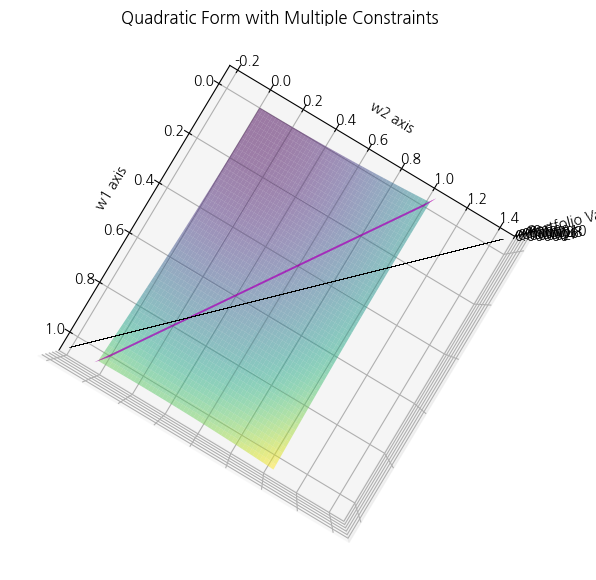

In [11]:
# Define the quadratic form
x = np.linspace(0, 1, 400)
y = np.linspace(0, 1, 400)
w1, w2 = np.meshgrid(x, y)

# Compute Z values for the quadratic form
Z = np.empty(w1.shape)
for i in range(w1.shape[0]):
    for j in range(w1.shape[1]):
        W = np.array([w1[i, j], w2[i, j]])
        Z[i, j] = W.T @ covMat @ W

# Create the 3D plot
fig = plt.figure(figsize=(12, 7))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=90, azim=30)

# Plot the surface for the quadratic form
surf = ax.plot_surface(w1, w2, Z, cmap='viridis', edgecolor='none', alpha=0.5)

# Generate Z values across the entire range for the constraint plane w1 + w2 = 1
z_plane_range = np.linspace(Z.min(), Z.max(), 400)
w1_line = np.linspace(0, 1, 400)
w2_line = 1 - w1_line
w1_plane_vertical = np.tile(w1_line, (len(z_plane_range), 1))
w2_plane_vertical = np.tile(w2_line, (len(z_plane_range), 1))
Z_plane_vertical = np.tile(z_plane_range[:, None], (1, len(w1_line)))

# Plot the vertical constraint plane representing w1 + w2 = 1
plane_vertical = ax.plot_surface(w1_plane_vertical, w2_plane_vertical, Z_plane_vertical, color='m', alpha=1)

w1_range = np.linspace(0, 1, 400)
Z_range_plane = np.linspace(Z.min(), Z.max(), 400)
w1_plane, Z_plane = np.meshgrid(w1_range, Z_range_plane)
w2_plane = (ERP - ER1*w1_plane) / ER2

plane_expected_return = ax.plot_surface(w1_plane, w2_plane, Z_plane, color='black', alpha=0.5, linewidth=0, antialiased=False)

# Labels and title
ax.set_title('Quadratic Form with Multiple Constraints')
ax.set_xlabel('w1 axis')
ax.set_ylabel('w2 axis')
ax.set_zlabel('Portfolio Variance')

# Show the plot
plt.show()

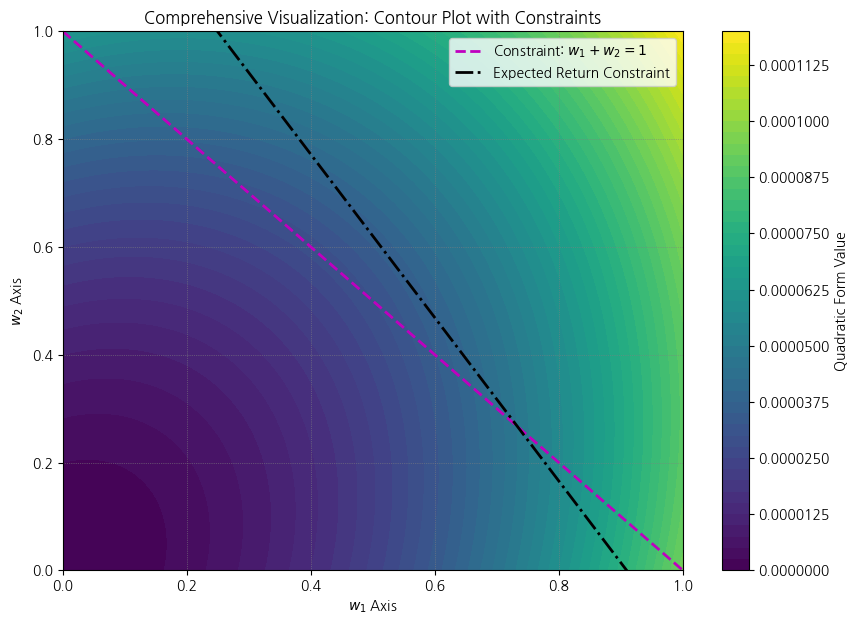

In [12]:
# Define the w1 and w2 ranges
w1_range = np.linspace(0, 1, 400)
w2_range = 1 - w1_range  # Constraint: w1 + w2 = 1

w2_expected_return = (ERP - ER1*w1_range) / ER2

# Combining everything into a single code block for a comprehensive visualization

# Setting up the figure
fig, ax = plt.subplots(figsize=(10, 7))

# Contour plot for the quadratic form
contour = ax.contourf(w1, w2, Z, levels=50, cmap='viridis')
fig.colorbar(contour, label='Quadratic Form Value')

# Plotting the constraint line (w1 + w2 = 1)
ax.plot(w1_range, w2_range, label='Constraint: $w_1 + w_2 = 1$', color='m', linewidth=2, linestyle='--')

# Plotting the expected return line (with dummy values)
ax.plot(w1_range, w2_expected_return, label='Expected Return Constraint', color='black', linewidth=2, linestyle='-.')

# Adding labels, title, and legend
ax.set_title('Comprehensive Visualization: Contour Plot with Constraints')
ax.set_xlabel('$w_1$ Axis')
ax.set_ylabel('$w_2$ Axis')
ax.legend()

# Adjusting plot limits and grid
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
plt.grid(True, which='both', linestyle=':', linewidth='0.5', color='grey')

plt.show()